<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/%C3%81rbol_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
% load_ext autoreload
% autoreload 2

from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
def plotBoundaryDT(data, labels, X_test,y_test, clf_1=None, N=20):
    class_1 = data[labels == 1]
    class_0 = data[labels == 0]
    mins = data[:,:2].min(axis=0)
    maxs = data[:,:2].max(axis=0)
    x1 = np.linspace(mins[0], maxs[0], N)
    x2 = np.linspace(mins[1], maxs[1], N)
    x1, x2 = np.meshgrid(x1, x2)
    X=np.c_[x1.flatten(), x2.flatten()]
    fig = plt.figure(figsize=(18,6))
    plt.subplot(121)
    ax = fig.gca()
    cm = plt.cm.RdBu
    if(clf_1):
        Z_nn = clf_1.predict_proba(X)[:, 0]
        Z_nn = Z_nn.reshape(x1.shape)
        ax.contourf(x1, x2, Z_nn,cmap=plt.cm.RdYlBu)

    class_1 = X_test[y_test == 1]
    class_0 = X_test[y_test == 0]
    plt.subplot(122)
    ax = fig.gca()
    cm = plt.cm.RdBu
    if(clf_1):
        Z_nn = clf_1.predict_proba(X)[:, 0]
        Z_nn = Z_nn.reshape(x1.shape)
        ax.contourf(x1, x2, Z_nn,cmap=plt.cm.RdYlBu)
    ax.scatter(class_1[:,0], class_1[:,1], color='r', s=20, alpha=0.5)
    ax.scatter(class_0[:,0], class_0[:,1], color='b', s=20, alpha=0.5)

In [ ]:
print(iris["data"][0])
print(iris["target"][0])
print(iris["target_names"])
print(iris["DESCR"])
print(iris["feature_names"])
print(iris["filename"])

[5.1 3.5 1.4 0.2]
0
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!

In [5]:
X = iris["data"]
y= iris["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

Train Score: 0.9821428571428571
Test Score: 0.9210526315789473


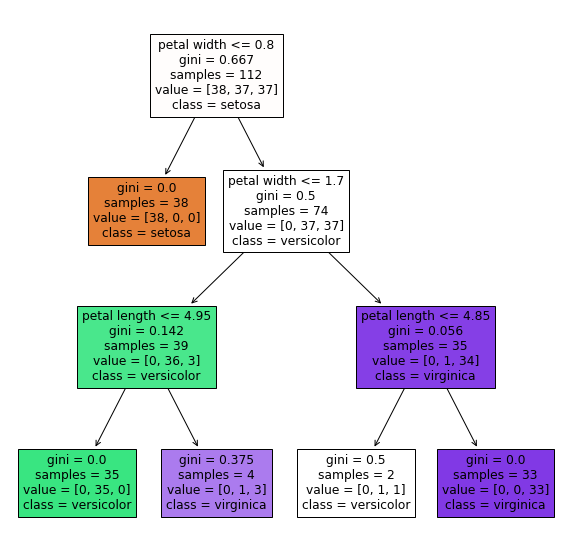

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini",
                                 splitter="best",
                                 max_depth=3)
clf = clf.fit(X_train, y_train)
print("Train Score: {}".format(clf.score(X_train,y_train)))
print("Test Score: {}".format(clf.score(X_test,y_test)))
plt.figure(figsize=[10,10])
# Disponible en la versión 0.21.3 de sklearn
out=tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["sepal length","sepal width","petal length","petal width"],
                   class_names=iris["target_names"],
                   filled=True,
                   impurity=True,
                   proportion=False)

In [ ]:
pw_1=0.667-74/112*0.5
pl_1=0.142*39/112-4/112*0.375
pl_2=0.056*35/112-2/112*0.5
pw_2=0.5*74/112-(39/112*0.142+35/112*0.056)
fi_pw=pw_1+pw_2
fi_pl=pl_1+pl_2
print(fi_pw/(fi_pw+fi_pl))
print(fi_pl/(fi_pw+fi_pl))

0.9307794582017617
0.06922054179823829


In [ ]:
clf.feature_importances_

array([0.        , 0.        , 0.06903089, 0.93096911])

Generamos datos un poco más complicados

In [1]:
import numpy as np
def generate_gaussians(N0,N1,mu0,mu1,s):
    # N1: Cantidad de personas
    sigma=[[s,0],[0,s]]
    np.random.seed(231)
    X=np.vstack([np.random.multivariate_normal(mu0, sigma,N0),np.random.multivariate_normal(mu1, sigma,N1)])
    y=np.hstack([np.zeros(N0),np.ones(N1)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test=generate_gaussians(N0=1000,N1=1000,mu0=[2,5],mu1=[3,3],s=2)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 splitter="random",
                                 max_depth=10)
clf = clf.fit(X_train, y_train)
print("Train Score: {}".format(clf.score(X_train,y_train)))
print("Test Score: {}".format(clf.score(X_test,y_test)))
plt.figure(figsize=[10,10])


out=tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["X1","X2"],
                   class_names=["0","1"],
                   filled=True,
                   impurity=True,
                   proportion=False)

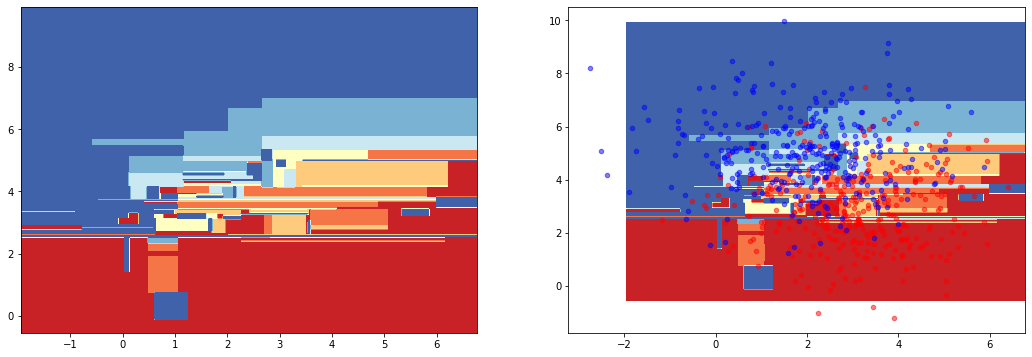

In [ ]:
plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)

Train Score: 0.9977611940298508
Test Score: 0.7257575757575757


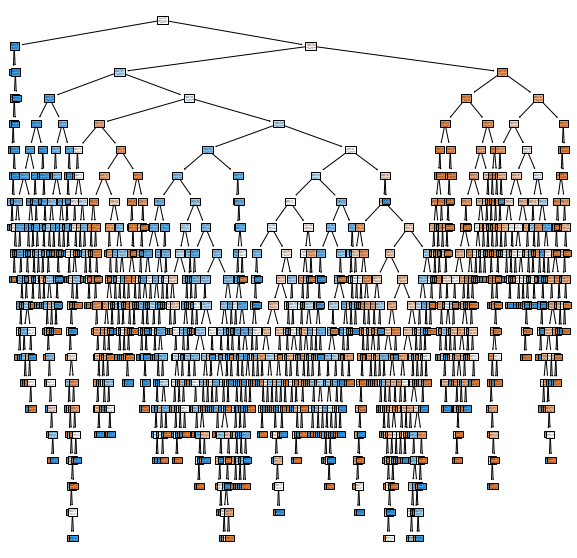

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 splitter="random",
                                 max_depth=20)
clf = clf.fit(X_train, y_train)
print("Train Score: {}".format(clf.score(X_train,y_train)))
print("Test Score: {}".format(clf.score(X_test,y_test)))
plt.figure(figsize=[10,10])


out=tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["X1","X2"],
                   class_names=["0","1"],
                   filled=True,
                   impurity=True,
                   proportion=False)

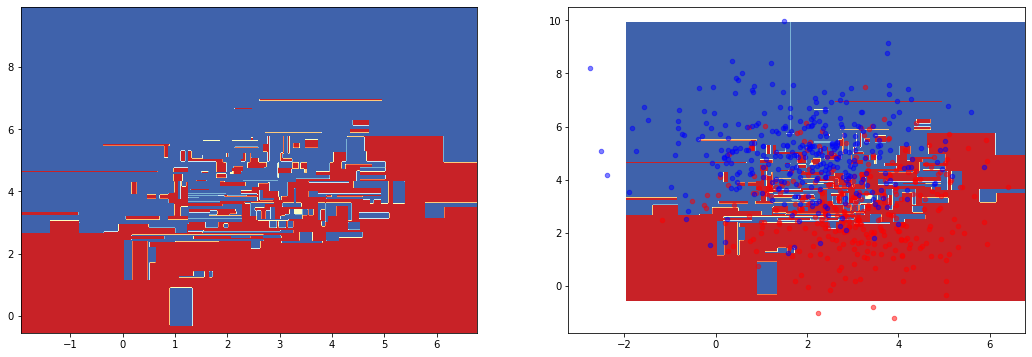

In [ ]:
plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)

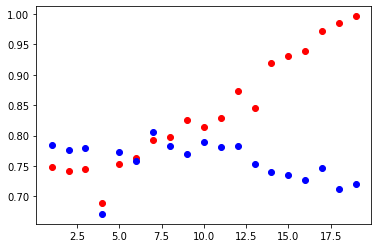

In [25]:
for x in range(1,20):
  clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 splitter="random",
                                 max_depth=x)
  clf = clf.fit(X_train, y_train)
  plt.scatter(x, clf.score(X_train,y_train), color="red")
  plt.scatter(x, clf.score(X_test,y_test), color="blue")